In [1]:
import re
import pandas

In [5]:
def get_names():
    with open('../data/adult.names') as names_file:
        for line in names_file:
            match = re.match("([\w-]+):", line)
            if match:
                yield match.groups(0)[0]
        yield "income-group"

In [7]:
data = pandas.read_csv('../data/adult.data.gz', names=list(get_names()))

In [22]:
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income-group
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [23]:
X = data[['age', 'education-num']]
y = (data['income-group'] == ' >50K')*1

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [65]:
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.3)

In [66]:
model = RandomForestClassifier().fit(Xtr, ytr)

In [67]:
model.predict_proba(Xte)

array([[0.78708211, 0.21291789],
       [0.84544183, 0.15455817],
       [0.68229168, 0.31770832],
       ...,
       [1.        , 0.        ],
       [0.6682146 , 0.3317854 ],
       [0.43684269, 0.56315731]])

In [68]:
# utilities for correct classificaion, misclassification: 0
class_utilities = [30, 70]

In [69]:
predicted_utilities = model.predict_proba(Xte) * class_utilities

In [70]:
predicted_utilities

array([[23.61246318, 14.90425258],
       [25.363255  , 10.81907166],
       [20.46875034, 22.23958255],
       ...,
       [30.        ,  0.        ],
       [20.04643809, 23.2249778 ],
       [13.10528077, 39.42101155]])

In [71]:
import numpy

In [72]:
decision = numpy.where(predicted_utilities[:,0] > predicted_utilities[:,1], 0, 1)

In [73]:
utility = (decision == yte) * numpy.where(decision, class_utilities[0], class_utilities[1])

In [74]:
utility

30171    70
13758    70
28950     0
1108     30
12233    70
         ..
7251     70
13334    70
11004    70
29430    30
7501      0
Name: income-group, Length: 9769, dtype: int64

In [75]:
utility.sum()

439370

In [76]:
from sklearn.utils import resample

In [77]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Histogram of utilities')

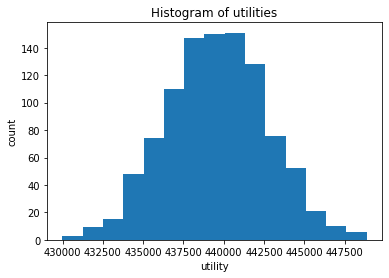

In [78]:
plt.hist([resample(utility).sum() for _ in range(1000)], bins=15)
plt.xlabel('utility')
plt.ylabel('count')
plt.title('Histogram of utilities')